In [22]:
from tx_main import H_field, deg_to_rad
from  numpy import arange, empty, divide, log10, array, savetxt, zeros, loadtxt, sum
from itertools import product
import pickle
import matplotlib.pyplot as plt
import random

In [ ]:
SPATIAL_RES = 2
z_t_range = arange(0,-4,-1) # Position in z-axis [m] of emitter (wrt Inertial reference system [i_h, j_h, k_h]
z_range = [2]

alpha_range = arange(1,141,45)
beta_range = arange(1,141,45)

In [24]:
def build_configuration(z_r,z_t_r,alpha_r,beta_r):
    l = [z_r,z_t_r,alpha_r,beta_r]
    return product(*l)

def dictionary_configuration(config):
    return {'z_r': config[0],'z_t': config[1],'alpha': config[2],'beta': config[3]}

def configuration_name(config_dictionary):
    s = "conf"
    for k,v in config_dictionary.items():
        s += " "+k+str(v)
    return s

In [ ]:
## Section that produces data of case_0
def produce_data_0(conf_dic, x_range, y_range, x_t, y_t):
    H_field_x_map = empty([len(x_range), len(y_range)])
    H_field_y_map = empty([len(x_range), len(y_range)])
    H_field_z_map = empty([len(x_range), len(y_range)])

    H_field_module_map = empty([len(x_range), len(y_range)])
    H_field_module_normalized_map = empty([len(x_range), len(y_range)])

    H_field_theta_map = empty([len(x_range), len(y_range)])
    H_field_phi_map = empty([len(x_range), len(y_range)])

    z_r = conf_dic['z_r']
    z_t = conf_dic['z_t']
    alpha = conf_dic['alpha']
    beta = conf_dic['beta']

   #sensing: each H_field call is a sensed position 
    for [i,x_r] in enumerate(x_range):

        for [j,y_r] in enumerate(y_range):

            [H_field_x, H_field_y, H_field_z, H_field_module, H_field_theta, H_field_phi] = H_field(x_r - x_t, y_r - y_t, z_r - z_t, deg_to_rad(alpha), deg_to_rad(beta))

            H_field_x_map[i, j] = H_field_x
            H_field_y_map[i, j] = H_field_y
            H_field_z_map[i, j] = H_field_z

            H_field_module_map[i, j] = H_field_module

            H_field_theta_map[i, j] = H_field_theta
            H_field_phi_map[i, j] = H_field_phi

    # Normalize the H field module values
    H_max = H_field_module_map.max()
    H_field_module_normalized_map = divide(H_field_module_map, H_max)
    H_field_module_normalized_db_map = 20*log10(H_field_module_normalized_map)
    return H_field_x_map, H_field_y_map, H_field_z_map, H_field_module_normalized_db_map, H_field_theta_map, H_field_phi_map

def config_data_case_0(conf_dic, spatial_resolution):
    x_range = arange(0 + spatial_resolution / 2, 20 + spatial_resolution / 2, spatial_resolution)
    y_range = arange(0 + spatial_resolution / 2, 20 + spatial_resolution / 2, spatial_resolution)
    H_field_x_map_vars, H_field_y_map_vars, H_field_z_map_vars, H_field_module_normalized_map_vars, H_field_theta_map_vars, H_field_phi_map_vars = [], [], [], [], [], []
    targets = []
    for x_t in x_range:
        for y_t in y_range:
            H_field_x_map, H_field_y_map, H_field_z_map, H_field_module_normalized_map, H_field_theta_map, H_field_phi_map = produce_data_0(conf_dic, x_range, y_range, x_t, y_t)
            H_field_x_map_vars.append(H_field_x_map)
            H_field_y_map_vars.append(H_field_y_map)
            H_field_z_map_vars.append(H_field_z_map)
            H_field_module_normalized_map_vars.append(H_field_module_normalized_map)
            H_field_theta_map_vars.append(H_field_theta_map)
            H_field_phi_map_vars.append(H_field_phi_map)
            targets.append((x_t, y_t))
    return array(H_field_x_map_vars), array(H_field_y_map_vars), array(H_field_z_map_vars), array(H_field_module_normalized_map_vars), array(H_field_theta_map_vars), array(H_field_phi_map_vars), array(targets)


In [ ]:
## Section that produces data of case_1
def produce_data_1(conf_dic, x_range, y_range, x_t, y_t):
    H_field_x_map = empty([len(x_range), len(y_range)])
    H_field_y_map = empty([len(x_range), len(y_range)])
    H_field_z_map = empty([len(x_range), len(y_range)])

    H_field_module_map = empty([len(x_range), len(y_range)])
    H_field_module_normalized_map = empty([len(x_range), len(y_range)])

    H_field_theta_map = empty([len(x_range), len(y_range)])
    H_field_phi_map = empty([len(x_range), len(y_range)])

    z_r = conf_dic['z_r']
    z_t = conf_dic['z_t']
    alpha = conf_dic['alpha']
    beta = conf_dic['beta']

    not_sensed = [ 1, 2, 3, 17,18, 19]

   #sensing: each H_field call is a sensed position 
    for [i,x_r] in enumerate([x for x in x_range if x not in not_sensed]):

        for [j,y_r] in enumerate([x for x in y_range if x not in not_sensed]):

            [H_field_x, H_field_y, H_field_z, H_field_module, H_field_theta, H_field_phi] = H_field(x_r - x_t, y_r - y_t, z_r - z_t, deg_to_rad(alpha), deg_to_rad(beta))

            H_field_x_map[i, j] = H_field_x
            H_field_y_map[i, j] = H_field_y
            H_field_z_map[i, j] = H_field_z

            H_field_module_map[i, j] = H_field_module

            H_field_theta_map[i, j] = H_field_theta
            H_field_phi_map[i, j] = H_field_phi

    # Normalize the H field module values
    H_max = H_field_module_map.max()
    H_field_module_normalized_map = divide(H_field_module_map, H_max)
    H_field_module_normalized_db_map = 20*log10(H_field_module_normalized_map)
    return H_field_x_map, H_field_y_map, H_field_z_map, H_field_module_normalized_db_map, H_field_theta_map, H_field_phi_map

def config_data_case_1(conf_dic, spatial_resolution):
    x_t_range = arange(0 + spatial_resolution / 2, 20 + spatial_resolution / 2, spatial_resolution)
    y_t_range = arange(0 + spatial_resolution / 2, 20 + spatial_resolution / 2, spatial_resolution)
    H_field_x_map_vars, H_field_y_map_vars, H_field_z_map_vars, H_field_module_normalized_map_vars, H_field_theta_map_vars, H_field_phi_map_vars = [], [], [], [], [], []
    targets = []
    x_r_range = arange(3 + spatial_resolution / 2, 17 + spatial_resolution / 2, spatial_resolution)
    y_r_range = arange(3 + spatial_resolution / 2, 17 + spatial_resolution / 2, spatial_resolution)
    for x_t in x_t_range:
        for y_t in y_t_range:
            H_field_x_map, H_field_y_map, H_field_z_map, H_field_module_normalized_map, H_field_theta_map, H_field_phi_map = produce_data_0(conf_dic, x_r_range, y_r_range, x_t, y_t)
            H_field_x_map_vars.append(H_field_x_map)
            H_field_y_map_vars.append(H_field_y_map)
            H_field_z_map_vars.append(H_field_z_map)
            H_field_module_normalized_map_vars.append(H_field_module_normalized_map)
            H_field_theta_map_vars.append(H_field_theta_map)
            H_field_phi_map_vars.append(H_field_phi_map)
            targets.append((x_t, y_t))
    return array(H_field_x_map_vars), array(H_field_y_map_vars), array(H_field_z_map_vars), array(H_field_module_normalized_map_vars), array(H_field_theta_map_vars), array(H_field_phi_map_vars), array(targets)

In [ ]:
## Section that produces data of case_1b
def produce_data_1b(conf_dic, x_range, y_range, x_t, y_t):
    H_field_x_map = zeros([len(x_range), int(len(y_range)/2)])
    H_field_y_map = zeros([len(x_range), int(len(y_range)/2)])
    H_field_z_map = zeros([len(x_range), int(len(y_range)/2)])

    H_field_module_map = zeros([len(x_range), int(len(y_range)/2)])
    H_field_module_normalized_map = zeros([len(x_range), int(len(y_range)/2)])

    H_field_theta_map = zeros([len(x_range), int(len(y_range)/2)])
    H_field_phi_map = zeros([len(x_range), int(len(y_range)/2)])

    z_r = conf_dic['z_r']
    z_t = conf_dic['z_t']
    alpha = conf_dic['alpha']
    beta = conf_dic['beta']
    

    #sensing: each H_field call is a sensed position 
    for [i,x_r] in enumerate(x_range):

        for [j,y_r] in enumerate(y_range):

            if (i+j)%2 == 0:
                s=int(j/2)
                [H_field_x, H_field_y, H_field_z, H_field_module, H_field_theta, H_field_phi] = H_field(x_r - x_t, y_r - y_t, z_r - z_t, deg_to_rad(alpha), deg_to_rad(beta))

                H_field_x_map[i, s] = H_field_x
                H_field_y_map[i, s] = H_field_y
                H_field_z_map[i, s] = H_field_z

                H_field_module_map[i, s] = H_field_module

                H_field_theta_map[i, s] = H_field_theta
                H_field_phi_map[i, s] = H_field_phi

    # Normalize the H field module values
    H_max = H_field_module_map.max()
    H_field_module_normalized_map = divide(H_field_module_map, H_max)
    H_field_module_normalized_db_map = 20*log10(H_field_module_normalized_map)
    return H_field_x_map, H_field_y_map, H_field_z_map, H_field_module_normalized_db_map, H_field_theta_map, H_field_phi_map

def config_data_case_1b(conf_dic, spatial_resolution):
    x_range = arange(0 + spatial_resolution / 2, 20 + spatial_resolution / 2, spatial_resolution)
    y_range = arange(0 + spatial_resolution / 2, 20 + spatial_resolution / 2, spatial_resolution)
    H_field_x_map_vars, H_field_y_map_vars, H_field_z_map_vars, H_field_module_normalized_map_vars, H_field_theta_map_vars, H_field_phi_map_vars = [], [], [], [], [], []
    targets = []
    for x_t in [x for x in x_range]:
        for y_t in [x for x in y_range]:
            H_field_x_map, H_field_y_map, H_field_z_map, H_field_module_normalized_map, H_field_theta_map, H_field_phi_map = produce_data_1b(conf_dic, x_range, y_range, x_t, y_t)
            H_field_x_map_vars.append(H_field_x_map)
            H_field_y_map_vars.append(H_field_y_map)
            H_field_z_map_vars.append(H_field_z_map)
            H_field_module_normalized_map_vars.append(H_field_module_normalized_map)
            H_field_theta_map_vars.append(H_field_theta_map)
            H_field_phi_map_vars.append(H_field_phi_map)
            targets.append((x_t, y_t))
    return array(H_field_x_map_vars), array(H_field_y_map_vars), array(H_field_z_map_vars), array(H_field_module_normalized_map_vars), array(H_field_theta_map_vars), array(H_field_phi_map_vars), array(targets)

In [ ]:
# Section that produces data with random distribution:
# Firstly we sample with SOBOL 50 points inside the grid,
# Then we assume that the model sampled the signal in the relative point

import numpy as np
from scipy.stats.qmc import LatinHypercube, Sobol, Halton, scale

n_samples = 50
dim = 2
l_bounds, u_bounds = [0, 0], [20, 20]

sobol = Sobol(d=dim, scramble=True)  # Scramble adds some randomness to avoid regular patterns
sobol_samples = scale(sobol.random_base2(m=6)[:n_samples], l_bounds, u_bounds)

def produce_data_random_custom(conf_dic, x_range, y_range, x_t, y_t):
    H_field_x_map = zeros([len(x_range), len(y_range)])
    H_field_y_map = zeros([len(x_range), len(y_range)])
    H_field_z_map = zeros([len(x_range), len(y_range)])

    H_field_module_map = zeros([len(x_range), len(y_range)])
    H_field_module_normalized_map = zeros([len(x_range), len(y_range)])

    H_field_theta_map = zeros([len(x_range), len(y_range)])
    H_field_phi_map = zeros([len(x_range), len(y_range)])

    z_r = conf_dic['z_r']
    z_t = conf_dic['z_t']
    alpha = conf_dic['alpha']
    beta = conf_dic['beta']

    sobol = Sobol(d=dim, scramble=True)  # Scramble adds some randomness to avoid regular patterns
    sobol_samples = scale(sobol.random_base2(m=6)[:n_samples], l_bounds, u_bounds)
   #sensing: each H_field call is a sensed position 
    for [i,x_r] in enumerate(x_range):
        x_samples = [a for a in sobol_samples if x_r-1<a[0]<x_r+1]
        for [j,y_r] in enumerate(y_range):
            samples = [a for a in x_samples if y_r-1<a[1]<y_r+1]
            for s in samples:
                [H_field_x, H_field_y, H_field_z, H_field_module, H_field_theta, H_field_phi] = H_field(s[0] - x_t, s[1] - y_t, z_r - z_t, deg_to_rad(alpha), deg_to_rad(beta))

                H_field_x_map[i, j] += H_field_x
                H_field_y_map[i, j] += H_field_y
                H_field_z_map[i, j] += H_field_z

                H_field_module_map[i, j] = +H_field_module
                H_field_theta_map[i, j] = + H_field_theta
                H_field_phi_map[i, j] = + H_field_phi
            if samples:
                H_field_x_map[i, j] /= len(samples)
                H_field_y_map[i, j] /= len(samples)
                H_field_z_map[i, j] /= len(samples)

                H_field_module_map[i, j] /= len(samples)
                H_field_theta_map[i, j] /= len(samples)
                H_field_phi_map[i, j] /= len(samples)
            

    # Normalize the H field module values
    H_max = H_field_module_map.max()
    H_field_module_normalized_map = divide(H_field_module_map, H_max)

    H_field_module_normalized_db_map = np.zeros((len(x_range), len(y_range)))
    for a in range(len(H_field_module_normalized_map)):
        for b in range(len(H_field_module_normalized_map)):
            if H_field_module_normalized_map[a][b] != 0:
                H_field_module_normalized_db_map[a][b] = 20*log10(H_field_module_normalized_map[a][b])
    return H_field_x_map, H_field_y_map, H_field_z_map, H_field_module_normalized_db_map, H_field_theta_map, H_field_phi_map

def config_data_random_custom(conf_dic, spatial_resolution):
    x_range = arange(0 + spatial_resolution / 2, 20 + spatial_resolution / 2, spatial_resolution)
    y_range = arange(0 + spatial_resolution / 2, 20 + spatial_resolution / 2, spatial_resolution)
    H_field_x_map_vars, H_field_y_map_vars, H_field_z_map_vars, H_field_module_normalized_map_vars, H_field_theta_map_vars, H_field_phi_map_vars = [], [], [], [], [], []
    targets = []
    for x_t in x_range:
        for y_t in y_range:
            H_field_x_map, H_field_y_map, H_field_z_map, H_field_module_normalized_map, H_field_theta_map, H_field_phi_map = produce_data_random_custom(conf_dic, x_range, y_range, x_t, y_t)
            H_field_x_map_vars.append(H_field_x_map)
            H_field_y_map_vars.append(H_field_y_map)
            H_field_z_map_vars.append(H_field_z_map)
            H_field_module_normalized_map_vars.append(H_field_module_normalized_map)
            H_field_theta_map_vars.append(H_field_theta_map)
            H_field_phi_map_vars.append(H_field_phi_map)
            targets.append((x_t, y_t))
    return array(H_field_x_map_vars), array(H_field_y_map_vars), array(H_field_z_map_vars), array(H_field_module_normalized_map_vars), array(H_field_theta_map_vars), array(H_field_phi_map_vars), array(targets)


In [ ]:
# Section that produces data with random distribution:
# Firstly we sample with SOBOL 50 points inside the grid,
# Then we assume that the model sampled the signal in the relative point

import numpy as np
from scipy.stats.qmc import LatinHypercube, Sobol, Halton, scale

n_samples = 50
dim = 2
l_bounds, u_bounds = [0, 0], [20, 20]

sobol = Sobol(d=dim, scramble=True)  # Scramble adds some randomness to avoid regular patterns
sobol_samples = scale(sobol.random_base2(m=6)[:n_samples], l_bounds, u_bounds)

def produce_data_random_custom_z_error(conf_dic, x_range, y_range, x_t, y_t):
    H_field_x_map = zeros([len(x_range), len(y_range)])
    H_field_y_map = zeros([len(x_range), len(y_range)])
    H_field_z_map = zeros([len(x_range), len(y_range)])

    H_field_module_map = zeros([len(x_range), len(y_range)])
    H_field_module_normalized_map = zeros([len(x_range), len(y_range)])

    H_field_theta_map = zeros([len(x_range), len(y_range)])
    H_field_phi_map = zeros([len(x_range), len(y_range)])

    z_r = conf_dic['z_r'] + random.random()
    z_t = conf_dic['z_t']
    alpha = conf_dic['alpha']
    beta = conf_dic['beta']

    sobol = Sobol(d=dim, scramble=True)  # Scramble adds some randomness to avoid regular patterns
    sobol_samples = scale(sobol.random_base2(m=6)[:n_samples], l_bounds, u_bounds)
   #sensing: each H_field call is a sensed position 
    for [i,x_r] in enumerate(x_range):
        x_samples = [a for a in sobol_samples if x_r-1<a[0]<x_r+1]
        for [j,y_r] in enumerate(y_range):
            samples = [a for a in x_samples if y_r-1<a[1]<y_r+1]
            for s in samples:
                [H_field_x, H_field_y, H_field_z, H_field_module, H_field_theta, H_field_phi] = H_field(s[0] - x_t, s[1] - y_t, z_r - z_t, deg_to_rad(alpha), deg_to_rad(beta))

                H_field_x_map[i, j] += H_field_x
                H_field_y_map[i, j] += H_field_y
                H_field_z_map[i, j] += H_field_z

                H_field_module_map[i, j] = +H_field_module
                H_field_theta_map[i, j] = + H_field_theta
                H_field_phi_map[i, j] = + H_field_phi
            if samples:
                H_field_x_map[i, j] /= len(samples)
                H_field_y_map[i, j] /= len(samples)
                H_field_z_map[i, j] /= len(samples)

                H_field_module_map[i, j] /= len(samples)
                H_field_theta_map[i, j] /= len(samples)
                H_field_phi_map[i, j] /= len(samples)
            

    # Normalize the H field module values
    H_max = H_field_module_map.max()
    H_field_module_normalized_map = divide(H_field_module_map, H_max)

    H_field_module_normalized_db_map = np.zeros((len(x_range), len(y_range)))
    for a in range(len(H_field_module_normalized_map)):
        for b in range(len(H_field_module_normalized_map)):
            if H_field_module_normalized_map[a][b] != 0:
                H_field_module_normalized_db_map[a][b] = 20*log10(H_field_module_normalized_map[a][b])
    return H_field_x_map, H_field_y_map, H_field_z_map, H_field_module_normalized_db_map, H_field_theta_map, H_field_phi_map

def config_data_random_custom_z_error(conf_dic, spatial_resolution):
    x_range = arange(0 + spatial_resolution / 2, 20 + spatial_resolution / 2, spatial_resolution)
    y_range = arange(0 + spatial_resolution / 2, 20 + spatial_resolution / 2, spatial_resolution)
    H_field_x_map_vars, H_field_y_map_vars, H_field_z_map_vars, H_field_module_normalized_map_vars, H_field_theta_map_vars, H_field_phi_map_vars = [], [], [], [], [], []
    targets = []
    for x_t in x_range:
        for y_t in y_range:
            H_field_x_map, H_field_y_map, H_field_z_map, H_field_module_normalized_map, H_field_theta_map, H_field_phi_map = produce_data_random_custom_z_error(conf_dic, x_range, y_range, x_t, y_t)
            H_field_x_map_vars.append(H_field_x_map)
            H_field_y_map_vars.append(H_field_y_map)
            H_field_z_map_vars.append(H_field_z_map)
            H_field_module_normalized_map_vars.append(H_field_module_normalized_map)
            H_field_theta_map_vars.append(H_field_theta_map)
            H_field_phi_map_vars.append(H_field_phi_map)
            targets.append((x_t, y_t))
    return array(H_field_x_map_vars), array(H_field_y_map_vars), array(H_field_z_map_vars), array(H_field_module_normalized_map_vars), array(H_field_theta_map_vars), array(H_field_phi_map_vars), array(targets)


In [ ]:
# Sampling data relative to case_custom
def produce_data_custom(conf_dic, x_range, y_range, x_t, y_t):
    len_xrange = len(x_range)-1
    H_field_x_map = zeros([len_xrange, 4])
    H_field_y_map = zeros([len_xrange, 4])
    H_field_z_map = zeros([len_xrange, 4])

    H_field_module_map = zeros([len_xrange, 4])
    H_field_module_normalized_map = zeros([len_xrange, 4])

    H_field_theta_map = zeros([len_xrange, 4])
    H_field_phi_map = zeros([len_xrange, 4])

    z_r = conf_dic['z_r']
    z_t = conf_dic['z_t']
    alpha = conf_dic['alpha']
    beta = conf_dic['beta']
    

    #sensing: each H_field call is a sensed position 
    for [i,x_r] in enumerate(x_range):
        for [j,y_r] in enumerate(y_range):

            if j!=0 and j!=len_xrange and i!=0 and i!=len_xrange : 
                continue
            elif i==0 and j != len_xrange:
                s=0
                w=j
            elif j== len_xrange and i != len_xrange:
                s=1
                w=i
            elif i== len_xrange and j != 0:
                s=2
                w=j-1
            elif j== 0 :
                s=3
                w=i-1
                
            [H_field_x, H_field_y, H_field_z, H_field_module, H_field_theta, H_field_phi] = H_field(x_r - x_t, y_r - y_t, z_r - z_t, deg_to_rad(alpha), deg_to_rad(beta))

            H_field_x_map[w, s] = H_field_x
            H_field_y_map[w, s] = H_field_y
            H_field_z_map[w, s] = H_field_z

            H_field_module_map[w, s] = H_field_module

            H_field_theta_map[w, s] = H_field_theta
            H_field_phi_map[w, s] = H_field_phi

    # Normalize the H field module values
    H_max = H_field_module_map.max()
    H_field_module_normalized_map = divide(H_field_module_map, H_max)
    H_field_module_normalized_db_map = 20*log10(H_field_module_normalized_map)
    return H_field_x_map, H_field_y_map, H_field_z_map, H_field_module_normalized_db_map, H_field_theta_map, H_field_phi_map

def config_data_case_custom(conf_dic, spatial_resolution):
    x_range = arange(0 + spatial_resolution / 2, 20 + spatial_resolution / 2, spatial_resolution)
    y_range = arange(0 + spatial_resolution / 2, 20 + spatial_resolution / 2, spatial_resolution)
    H_field_x_map_vars, H_field_y_map_vars, H_field_z_map_vars, H_field_module_normalized_map_vars, H_field_theta_map_vars, H_field_phi_map_vars = [], [], [], [], [], []
    targets = []
    for x_t in [x for x in x_range]:
        for y_t in [x for x in y_range]:
            H_field_x_map, H_field_y_map, H_field_z_map, H_field_module_normalized_map, H_field_theta_map, H_field_phi_map = produce_data_custom(conf_dic, x_range, y_range, x_t, y_t)
            H_field_x_map_vars.append(H_field_x_map)
            H_field_y_map_vars.append(H_field_y_map)
            H_field_z_map_vars.append(H_field_z_map)
            H_field_module_normalized_map_vars.append(H_field_module_normalized_map)
            H_field_theta_map_vars.append(H_field_theta_map)
            H_field_phi_map_vars.append(H_field_phi_map)
            targets.append((x_t, y_t))
    return array(H_field_x_map_vars), array(H_field_y_map_vars), array(H_field_z_map_vars), array(H_field_module_normalized_map_vars), array(H_field_theta_map_vars), array(H_field_phi_map_vars), array(targets)

In [30]:
def save_config(conf_dic, H_field_x_maps, H_field_y_maps, H_field_z_maps, H_field_module_normalized_maps, H_field_theta_maps, H_field_phi_maps, targets):
    with open(configuration_name(conf_dic), 'wb') as file:
        data = {'H_field_x_maps':H_field_x_maps, 'H_field_y_maps':H_field_y_maps, 'H_field_z_maps':H_field_z_maps,'H_field_module_normalized_maps':H_field_module_normalized_maps,'H_field_theta_maps':H_field_theta_maps,'H_field_phi_maps':H_field_phi_maps,'targets':targets}
        pickle.dump(data,file)
    return

def load_config(conf_dic):
    with open(configuration_name(conf_dic), 'rb') as file:
    # Deserialize and retrieve the variable from the file
        loaded_data = pickle.load(file)    
    return loaded_data['H_field_x_maps'], loaded_data['H_field_y_maps'], loaded_data['H_field_z_maps'], loaded_data['H_field_module_normalized_maps'], loaded_data['H_field_theta_maps'], loaded_data['H_field_phi_maps'], loaded_data['targets']

In [ ]:
def save_case_0(H_field_x_maps_conf, H_field_y_maps_conf, H_field_z_maps_conf, H_field_module_normalized_maps_conf, H_field_theta_maps_conf, H_field_phi_maps_conf, targets_conf):
    with open('case_0', 'wb') as file:
        data = {'H_field_x_maps_conf':H_field_x_maps_conf, 'H_field_y_maps_conf':H_field_y_maps_conf, 'H_field_z_maps_conf':H_field_z_maps_conf,'H_field_module_normalized_maps_conf':H_field_module_normalized_maps_conf,
            'H_field_theta_maps_conf':H_field_theta_maps_conf,'H_field_phi_maps_conf':H_field_phi_maps_conf,'targets_conf':targets_conf}
        pickle.dump(data,file)
    return

def load_case_0():
    with open('case_0', 'rb') as file:
        loaded_data = pickle.load(file)
    return loaded_data['H_field_x_maps_conf'], loaded_data['H_field_y_maps_conf'], loaded_data['H_field_z_maps_conf'], loaded_data['H_field_module_normalized_maps_conf'], loaded_data['H_field_theta_maps_conf'], loaded_data['H_field_phi_maps_conf'], loaded_data['targets_conf']

In [32]:
def stack_configs_up(spatial_resolution,z_r,z_t_r,alpha_r,beta_r, config_fun):
    configs = build_configuration(z_r,z_t_r,alpha_r,beta_r)
    H_field_x_maps_conf, H_field_y_maps_conf, H_field_z_maps_conf, H_field_module_normalized_maps_conf, H_field_theta_maps_conf, H_field_phi_maps_conf, targets_conf = [],[],[],[],[],[],[]
    for conf in configs:
        conf_dict = dictionary_configuration(conf)
        H_field_x_maps, H_field_y_maps, H_field_z_maps, H_field_module_normalized_maps, H_field_theta_maps, H_field_phi_maps, targets = config_fun(conf_dict, spatial_resolution)
        H_field_x_maps_conf.append(H_field_x_maps)
        H_field_y_maps_conf.append(H_field_y_maps)
        H_field_z_maps_conf.append(H_field_z_maps)
        H_field_module_normalized_maps_conf.append(H_field_module_normalized_maps)
        H_field_theta_maps_conf.append(H_field_theta_maps)
        H_field_phi_maps_conf.append(H_field_phi_maps)
        targets_conf.append(targets)
    return array(H_field_x_maps_conf), array(H_field_y_maps_conf), array(H_field_z_maps_conf), array(H_field_module_normalized_maps_conf), array(H_field_theta_maps_conf), array(H_field_phi_maps_conf), array(targets_conf)

In [ ]:
config_type = config_data_random_custom()
H_field_x_maps_conf, H_field_y_maps_conf, H_field_z_maps_conf, H_field_module_normalized_maps_conf, H_field_theta_maps_conf, H_field_phi_maps_conf, targets_conf = stack_configs_up(SPATIAL_RES,z_range,z_t_range,alpha_range,beta_range, config_type)

In [ ]:
# Performing the reshape of the data in order to train independently of the angle
dim_sq_2=H_field_x_maps_conf.shape[2]
dim_sq_3=H_field_x_maps_conf.shape[3]
H_field_x_maps_conf = H_field_x_maps_conf.reshape(6400,dim_sq_2,dim_sq_3)
H_field_y_maps_conf = H_field_y_maps_conf.reshape(6400,dim_sq_2,dim_sq_3)
H_field_z_maps_conf = H_field_z_maps_conf.reshape(6400,dim_sq_2,dim_sq_3)
H_field_module_normalized_maps_conf = H_field_module_normalized_maps_conf.reshape(6400,dim_sq_2,dim_sq_3)
H_field_theta_maps_conf = H_field_theta_maps_conf.reshape(6400,dim_sq_2,dim_sq_3)
H_field_phi_maps_conf = H_field_phi_maps_conf.reshape(6400,dim_sq_2,dim_sq_3)
targets_conf = targets_conf.reshape(6400,2)
H_field_module_normalized_maps_conf.shape

(6400, 10, 10)

In [ ]:
# import pakages
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [ ]:
#definition of the dataset class
class MyDataset(Dataset):
    def __init__(self, data, targets, transform=None):
        self.data = data
        self.targets = torch.LongTensor(targets)
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        
        if self.transform:
            x = self.transform(x).type(torch.float32)
        return x, y
    
    def __len__(self):
        return len(self.data)

In [ ]:
#definition of all the models

class CNNMultiOutput_case0(nn.Module):
    def __init__(self):
        super(CNNMultiOutput_case0, self).__init__()
        # share layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()

        # head 1
        self.fc1_1 = nn.Linear(64 * 4 , 128)
        self.fc1_out = nn.Linear(128, 1)  # 10 classes for the 1st output

        # head 2
        self.fc2_1 = nn.Linear(64 * 4 , 128)
        self.fc2_out = nn.Linear(128, 1)  # 10 classes for the 2nd output

    def forward(self, x):
        # Shared layers
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.flatten(x)

        # First head
        x1 = torch.relu(self.fc1_1(x))
        out1 = self.fc1_out(x1)

        # Second head
        x2 = torch.relu(self.fc2_1(x))
        out2 = self.fc2_out(x2)

        return out1, out2
    
class CNNMultiOutput_case1(nn.Module):
    def __init__(self):
        super(CNNMultiOutput_case1, self).__init__()
        # share layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()

        # head 1
        self.fc1_1 = nn.Linear(64 , 128)
        self.fc1_out = nn.Linear(128, 1)  # 10 classes for the 1st output

        # head 2
        self.fc2_1 = nn.Linear(64 , 128)
        self.fc2_out = nn.Linear(128, 1)  # 10 classes for the 2nd output

    def forward(self, x):
        # Shared layers
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.flatten(x)

        # First head
        x1 = torch.relu(self.fc1_1(x))
        out1 = self.fc1_out(x1)

        # Second head
        x2 = torch.relu(self.fc2_1(x))
        out2 = self.fc2_out(x2)

        return out1, out2
    
class CNNMultiOutput_case1b(nn.Module):
    def __init__(self):
        super(CNNMultiOutput_case1b, self).__init__()
        # share layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()

        # head 1
        self.fc1_1 = nn.Linear(64 * 2 , 128)
        self.fc1_out = nn.Linear(128, 1)  # 10 classes for the 1st output

        # head 2
        self.fc2_1 = nn.Linear(64 * 2 , 128)
        self.fc2_out = nn.Linear(128, 1)  # 10 classes for the 2nd output

    def forward(self, x):
        # Shared layers
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.flatten(x)

        # First head
        x1 = torch.relu(self.fc1_1(x))
        out1 = self.fc1_out(x1)

        # Second head
        x2 = torch.relu(self.fc2_1(x))
        out2 = self.fc2_out(x2)

        return out1, out2
    
   # ###
   # DOUBLE BEACON
   # ### 

class CNNMultiOutput_case0_db(nn.Module):
    def __init__(self):
        super(CNNMultiOutput_case0_db, self).__init__()
        # share layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()

        # head 1
        self.fc1_1 = nn.Linear(64 * 4 , 128)
        self.fc1_out = nn.Linear(128, 1)  

        # head 2
        self.fc2_1 = nn.Linear(64 * 4 , 128)
        self.fc2_out = nn.Linear(128, 1) 
        
        # ##
        # SECOND BEACON
        # ##

        # head 3
        self.fc3_1 = nn.Linear(64 * 4 , 128)
        self.fc3_out = nn.Linear(128, 1) 

        # head 4
        self.fc4_1 = nn.Linear(64 * 4 , 128)
        self.fc4_out = nn.Linear(128, 1) 

    def forward(self, x):
        # Shared layers
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.flatten(x)

        # First head
        x1 = torch.relu(self.fc1_1(x))
        out1 = self.fc1_out(x1)

        # Second head
        x2 = torch.relu(self.fc2_1(x))
        out2 = self.fc2_out(x2)

        # Third head
        x3 = torch.relu(self.fc3_1(x))
        out3 = self.fc3_out(x3)

        # Fourth head
        x4 = torch.relu(self.fc4_1(x))
        out4 = self.fc4_out(x4)
        return out1, out2, out3, out4
    
class CNNMultiOutput_case1_db(nn.Module):
    def __init__(self):
        super(CNNMultiOutput_case1_db, self).__init__()
        # share layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()

        # head 1
        self.fc1_1 = nn.Linear(64 , 128)
        self.fc1_out = nn.Linear(128, 1) 

        # head 2
        self.fc2_1 = nn.Linear(64 , 128)
        self.fc2_out = nn.Linear(128, 1) 

        # ##
        # SECOND BEACON
        # ##

        # head 3
        self.fc3_1 = nn.Linear(64  , 128)
        self.fc3_out = nn.Linear(128, 1) 

        # head 4
        self.fc4_1 = nn.Linear(64 , 128)
        self.fc4_out = nn.Linear(128, 1) 

    def forward(self, x):
        # Shared layers
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.flatten(x)

        # First head
        x1 = torch.relu(self.fc1_1(x))
        out1 = self.fc1_out(x1)

        # Second head
        x2 = torch.relu(self.fc2_1(x))
        out2 = self.fc2_out(x2)

        # Third head
        x3 = torch.relu(self.fc3_1(x))
        out3 = self.fc3_out(x3)

        # Fourth head
        x4 = torch.relu(self.fc4_1(x))
        out4 = self.fc4_out(x4)
        return out1, out2, out3, out4
    
class CNNMultiOutput_case1b_db(nn.Module):
    def __init__(self):
        super(CNNMultiOutput_case1b_db, self).__init__()
        # share layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()

        # head 1
        self.fc1_1 = nn.Linear(64 * 2 , 128)
        self.fc1_out = nn.Linear(128, 1)  
        # head 2
        self.fc2_1 = nn.Linear(64 * 2 , 128)
        self.fc2_out = nn.Linear(128, 1) 

        # ##
        # SECOND BEACON
        # ##

        # head 3
        self.fc3_1 = nn.Linear(64  , 128)
        self.fc3_out = nn.Linear(128, 1) 

        # head 4
        self.fc4_1 = nn.Linear(64 , 128)
        self.fc4_out = nn.Linear(128, 1) 

    def forward(self, x):
        # Shared layers
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.flatten(x)

        # First head
        x1 = torch.relu(self.fc1_1(x))
        out1 = self.fc1_out(x1)

        # Second head
        x2 = torch.relu(self.fc2_1(x))
        out2 = self.fc2_out(x2)

        # Third head
        x3 = torch.relu(self.fc3_1(x))
        out3 = self.fc3_out(x3)

        # Fourth head
        x4 = torch.relu(self.fc4_1(x))
        out4 = self.fc4_out(x4)

        return out1, out2, out3, out4

In [ ]:
# Function defining the "random flight" of the drone in case_flight
def random_flight_left_to_right(matrix):
    movement = 1
    x = 0
    y = 0
    series = [(0,0)]
    lenght = len(matrix)
    width = len(matrix[0]) 
    while y<width:
        y_mov = random.choice([1,1,1,-1,-1,0,0,0]) #arbitrary choice of the flight parameters due to visual quality evaluation
        y_ = y + y_mov
        if y_<0:
            continue
        y=y_
        x = x + movement
        if x == lenght or x == 0:
            movement = -movement
        
        if y<=9 and x<=9:
            series.append((x,y))
    # print(series)
    return series

epoch:0 	 - train_loss:14.653272413851663	 - test_loss:7.9738771724940305	 - max_test_loss:133.06346130371094
random guess:([[13.887442]],[[2.136003]])                       vs (15.0,5.0)


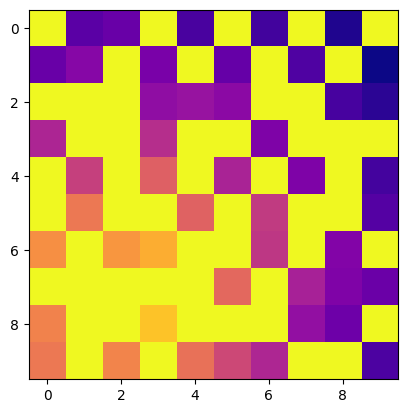

epoch:5 	 - train_loss:2.144568624033596	 - test_loss:2.199479259925647	 - max_test_loss:25.099754333496094
random guess:([[18.797632]],[[1.6623342]])                       vs (17.0,3.0)


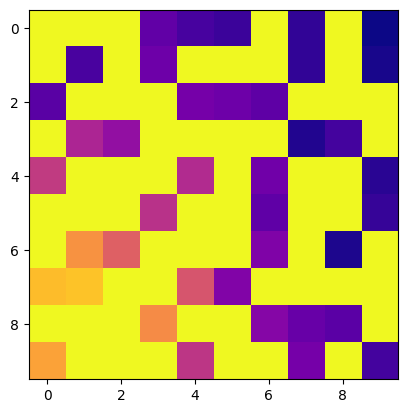

epoch:10 	 - train_loss:1.6002491205441742	 - test_loss:2.1330100101292375	 - max_test_loss:22.47982406616211
random guess:([[15.775299]],[[4.3186655]])                       vs (17.0,5.0)


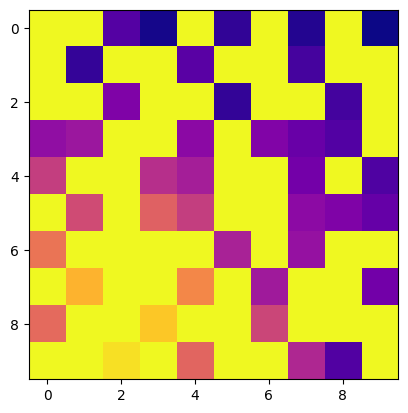

epoch:15 	 - train_loss:1.3301318609267754	 - test_loss:2.1551511976955227	 - max_test_loss:61.22535705566406
random guess:([[18.397001]],[[2.8099155]])                       vs (17.0,3.0)


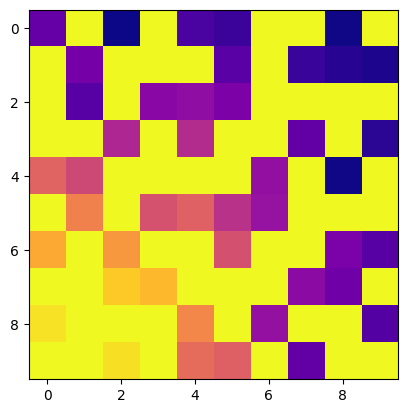

epoch:20 	 - train_loss:1.1735032317909713	 - test_loss:2.110613508334245	 - max_test_loss:21.668262481689453
random guess:([[10.771757]],[[14.972883]])                       vs (11.0,15.0)


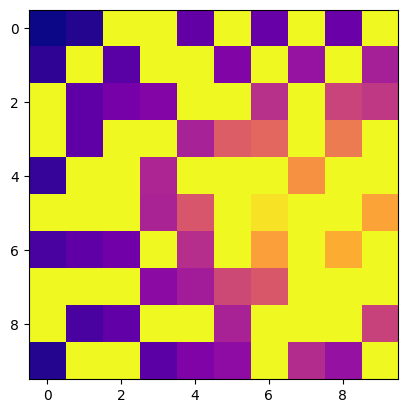

In [ ]:
num_beacons = 1
size_dataset = 6400

#######
## IMPORTANT
#######
##
## all case_random uses CNNMultiOutput_case0()
## config is the function defining the data we are investigating
## options : [ config_data_case_0, config_data_case_1,config_data_case_1b, config_data_case_custom, config_data_random_custom, config_data_random_custom_z_error ]

## TO MODIFY:
case = "name_of_the_data"
config = config_data_random_custom
model = CNNMultiOutput_case0()
##


BATCH_SIZE=1

H_field_x_maps_conf, H_field_y_maps_conf, H_field_z_maps_conf, H_field_module_normalized_maps_conf, H_field_theta_maps_conf, H_field_phi_maps_conf, targets_conf = stack_configs_up(SPATIAL_RES,z_range,z_t_range,alpha_range,beta_range, config)

dim_sq_2=H_field_module_normalized_maps_conf.shape[2]
dim_sq_3=H_field_module_normalized_maps_conf.shape[3]

H_field_module_normalized_maps_conf = H_field_module_normalized_maps_conf.reshape(6400,dim_sq_2,dim_sq_3)
targets_conf = targets_conf.reshape(6400,2)

##
# OPTIONAL ADD RANDOM PATH
## 

# num_paths = 10
# H_field_module_normalized_maps_conf_random_path = []
# targets_conf_random_path = []
# for s,matrix in  enumerate(H_field_module_normalized_maps_conf):
#     for i in range(num_paths):
#         series = random_flight_left_to_right(matrix)
#         path_matrix = zeros((len(matrix),len(matrix[0])))
#         for x,y in series:
#             path_matrix[y][x] = matrix[y][x]
#         H_field_module_normalized_maps_conf_random_path.append(path_matrix)
#         targets_conf_random_path.append(targets_conf[s])

dataset = MyDataset(H_field_module_normalized_maps_conf, targets_conf, transform=transforms.ToTensor())
train_set, val_set = torch.utils.data.random_split(dataset, [0.8, 0.2])
dataloader_train = DataLoader(train_set, batch_size=BATCH_SIZE)
dataloader_val = DataLoader(val_set, batch_size=BATCH_SIZE)

## HYPERPARAMETERS: TO INVESTIGATE DIFFERENT OPTIONS
epochs = 100
LR = 0.001
##

optimizer = torch.optim.Adam(model.parameters(),lr=LR)
criterion = nn.MSELoss()
S_trainloss = []
S_testloss = []
S_max_testloss = []
for epoch in range(epochs):
    model.train()
    total_loss = 0.0
    for x, y in dataloader_train:
        t1 = y[:,0].float()
        t2 = y[:,1].float()

        optimizer.zero_grad()
        outputs1, outputs2 = model(x)

        # losses for both heads
        loss1 = criterion(outputs1.squeeze(0), t1)
        loss2 = criterion(outputs2.squeeze(0), t2)
        loss = loss1 + loss2 

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    S_trainloss.append(total_loss/len(dataloader_train))
    model.eval()
    testloss = 0
    epoch_loss = []
    for x, y in dataloader_val:
        t1 = y[:,0].float()
        t2 = y[:,1].float()
        outputs1, outputs2 = model(x)

        # losses for both heads
        loss1 = criterion(outputs1.squeeze(0), t1)
        loss2 = criterion(outputs2.squeeze(0), t2)
        loss = loss1 + loss2 
        testloss += loss.item()
        epoch_loss.append(loss.item())

    S_testloss.append(testloss/len(dataloader_val))
    S_max_testloss.append(max(epoch_loss))
    if epoch % 5 == 0:
        print(f"epoch:{epoch} \t - train_loss:{total_loss/len(dataloader_train)}\t - test_loss:{testloss/len(dataloader_val)}\t - max_test_loss:{max(epoch_loss)}")
        x,y = val_set[random.randint(0,len(val_set))]
        t1 = y[0].float()
        t2 = y[1].float()
        outputs1, outputs2 = model(x.unsqueeze(0))
        print(f"random guess:({outputs1.detach().numpy()},{outputs2.detach().numpy()}) \
                vs ({t1},{t2})")
        plt.imshow(x.squeeze(0),cmap="plasma")
        plt.show()

final_eval_distances = []
for x, y in dataloader_val:
        t1 = y[:,0].float()
        t2 = y[:,1].float()
        outputs1, outputs2 = model(x)
        # losses for both heads
        loss1 = criterion(outputs1.squeeze(0), t1)
        loss2 = criterion(outputs2.squeeze(0), t2)
        loss = loss1 + loss2 
        testloss += loss.item()
        final_eval_distances.append(loss.item())
torch.save(model.state_dict(),"modelcase_"+case+"nb"+str(num_beacons)+".pt")
savetxt("testlossescase_"+case+"nb"+str(num_beacons)+".txt",S_testloss)
savetxt("trainlossescase_"+case+"nb"+str(num_beacons)+".txt",S_trainloss)
savetxt("Maxtestlossescase_"+case+"nb"+str(num_beacons)+".txt",S_max_testloss)
savetxt("final_eval_distances_"+case+"nb"+str(num_beacons)+".txt",final_eval_distances)




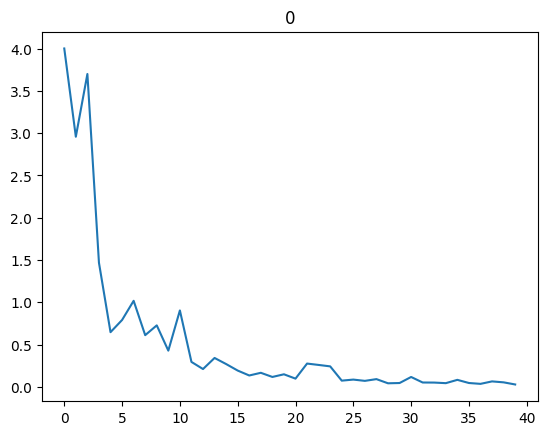

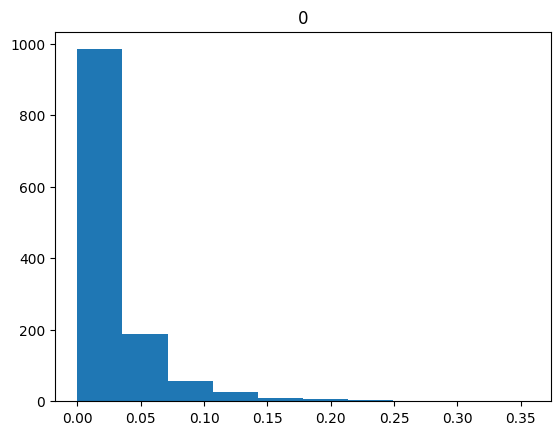

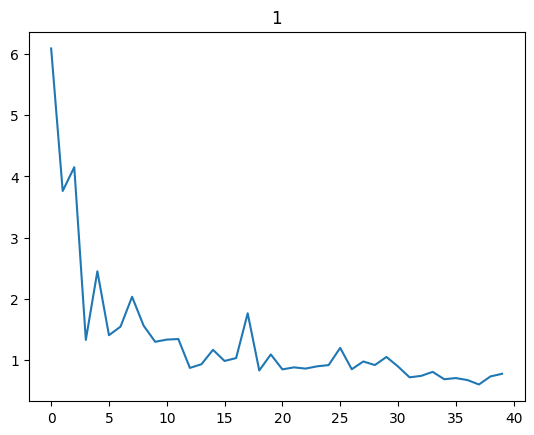

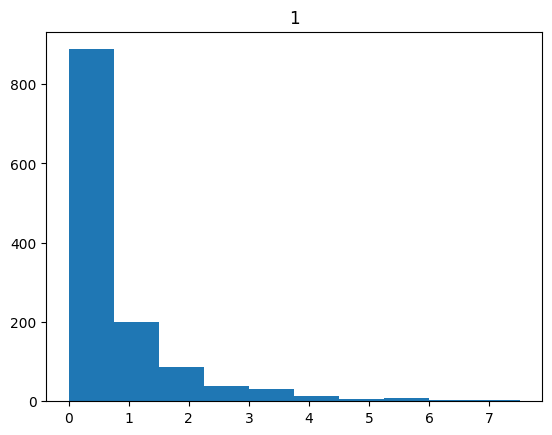

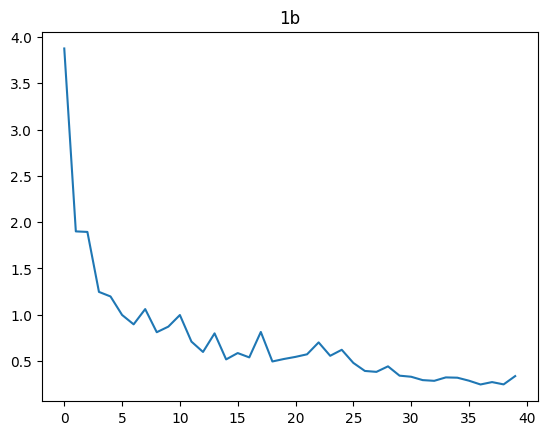

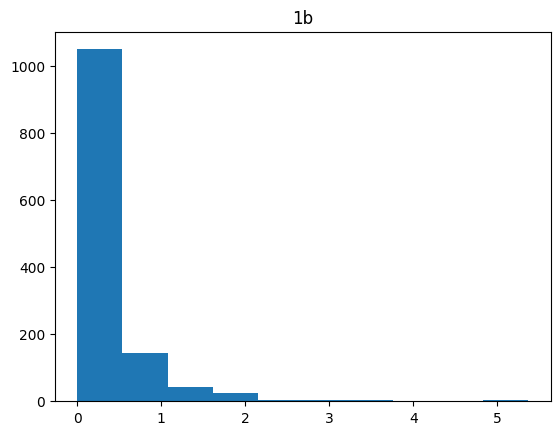

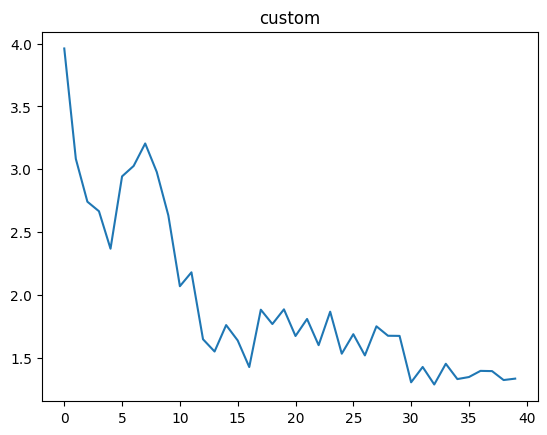

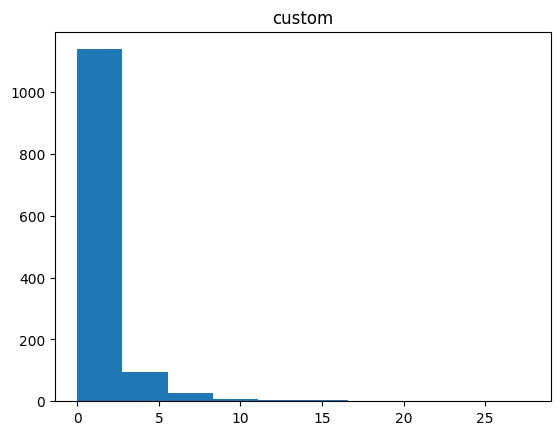

In [ ]:
# import numpy as np 
# import matplotlib.pyplot as plt

for case in ["0","1","1b","custom"]:
    # torch.save(model.state_dict(),"modelcase_"+case+"nb"+str(num_beacons)+".pt")
    tlos = np.loadtxt("testlossescase_"+case+"nb"+str(num_beacons)+".txt")
    trlos = np.loadtxt("trainlossescase_"+case+"nb"+str(num_beacons)+".txt")
    Maxlos = np.loadtxt("Maxtestlossescase_"+case+"nb"+str(num_beacons)+".txt")
    finallos = np.loadtxt("final_eval_distances_"+case+"nb"+str(num_beacons)+".txt")

    x_axis = np.arange(0,epochs,1)
    yaxis = tlos

    plt.plot(x_axis,yaxis)
    plt.title(case)
    plt.show()
    plt.close()

    plt.hist(finallos)
    mean = np.mean(finallos)
    plt.axvline(mean)
    plt.title(case)
    plt.show()
    plt.close



In [ ]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b


start = 100
stop = 200
testlosses = ["testlossescase_0.txt","testlossescase_1.txt","testlossescase_1b.txt","testlossescase_custom.txt"]
tranlosses = ["trainlossescase_0.txt","trainlossescase_1.txt","trainlossescase_1b.txt","trainlossescase_custom.txt"]
for name in testlosses:
    testloss = loadtxt(name)[start:stop]   #1280#5120
    if name !="testlossescase_custom.txt":
        testloss/=1280
    x_axis = arange(0,200,1)[start:stop]
    a,b = best_fit(x_axis,testloss)

    y_fit = a+b*x_axis
    
    plt.plot(x_axis,testloss)
    plt.plot(x_axis,y_fit)

In [ ]:
S_trainloss = []
S_testloss = []

for epoch in range(epochs):
    model.train()
    total_loss = 0.0
    for x, y in dataloader_train:

        t1 = y[:,0].float()
        t2 = y[:,1].float()
        optimizer.zero_grad()

        outputs1, outputs2 = model(x)

        # losses for both heads
        loss1 = criterion(outputs1.squeeze(0), t1)
        loss2 = criterion(outputs2.squeeze(0), t2)
        loss = loss1 + loss2
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    S_trainloss.append(total_loss)
    model.eval()
    testloss = 0
    for x, y in dataloader_val:
        t1 = y[:,0].float()
        t2 = y[:,1].float()
        optimizer.zero_grad()
        outputs1, outputs2 = model(x)

        # losses for both heads
        loss1 = criterion(outputs1.squeeze(0), t1)
        loss2 = criterion(outputs2.squeeze(0), t2)
        loss = loss1 + loss2
        testloss += loss.item()
    S_testloss.append(testloss)
    if epoch % 5 == 0:
        print(f"epoch:{epoch} \t - train_loss:{total_loss/len(dataloader_train)}\t - test_loss:{testloss/len(dataloader_val)}")
        x,y = val_set[random.randint(0,len(val_set))]
        t1 = y[0].float()
        t2 = y[1].float()
        outputs1, outputs2 = model(x.unsqueeze(0))
        print(f"random guess:({outputs1.detach().numpy()},{outputs2.detach().numpy()})\
               vs ({t1},{t2})")
        plt.imshow(x.squeeze(0),cmap="plasma")
        plt.show()
torch.save(model.state_dict(),"modelcase_1.pt")
savetxt("testlosses.txt",S_testloss)
savetxt("trainlosses.txt",S_trainloss)




In [ ]:
torch.save(model.state_dict(),"modelcase_1b.pt")
savetxt("testlosses.txt",S_testloss)
savetxt("trainlosses.txt",S_trainloss)